# **Regresión Lineal**

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from datetime import datetime, timedelta
import winsound

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

## **Datos**

In [7]:
df = pd.read_csv('../../Datos/insurance.csv')

In [8]:
df.reset_index(inplace=True)
df = df.rename(columns={'index':'ID'})

In [9]:
df.head()

,ID,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


## **Análisis de los datos**

In [10]:
df.describe()

,ID,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


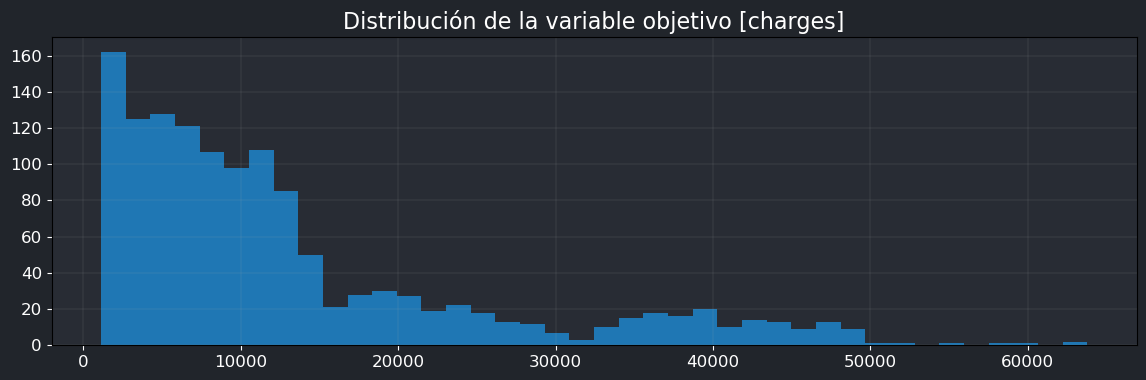

In [12]:
fig, ax = plt.subplots(figsize=(14, 4))
plt.title('Distribución de la variable objetivo [charges]', color='white', size=16)

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.hist(df['charges'], bins=40)

plt.xticks(color='white', size=12)
ax.tick_params(axis='x', labelcolor='white', color='white')

plt.yticks(color='white', size=12)
ax.tick_params(axis='y', labelcolor='white', color='white')

plt.grid(linewidth=0.1)

plt.show()

In [13]:
df['charges_log'] = df['charges'].apply(lambda x: np.log(x))

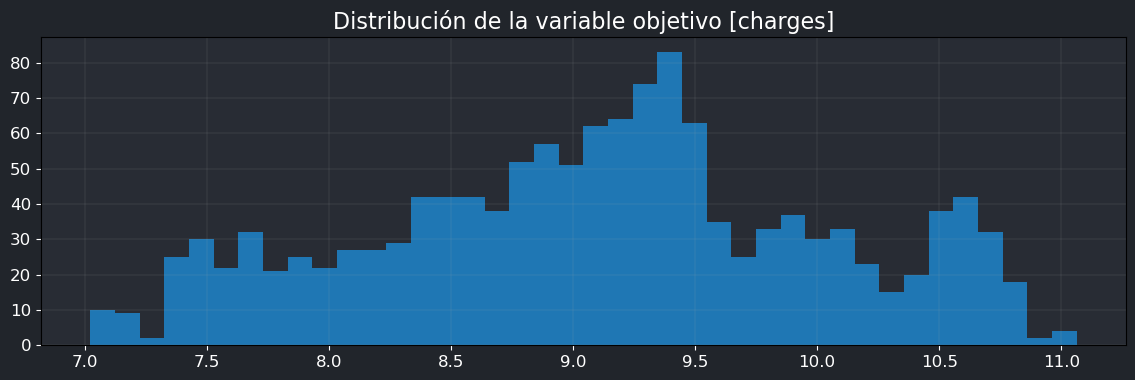

In [14]:
fig, ax = plt.subplots(figsize=(14, 4))
plt.title('Distribución de la variable objetivo [charges]', color='white', size=16)

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.hist(df['charges_log'], bins=40)

plt.xticks(color='white', size=12)
ax.tick_params(axis='x', labelcolor='white', color='white')

plt.yticks(color='white', size=12)
ax.tick_params(axis='y', labelcolor='white', color='white')

plt.grid(linewidth=0.1)

plt.show()

In [15]:
standarScaler = StandardScaler()
standarScaler.fit(np.array(df['charges_log']).reshape(-1, 1))

StandardScaler()

In [16]:
df['charges_log_est'] = standarScaler.transform(np.array(df['charges_log']).reshape(-1, 1))

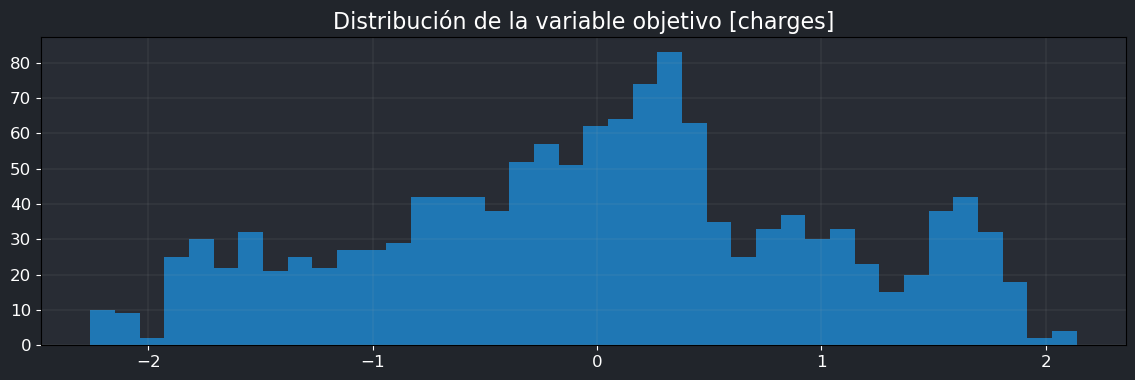

In [17]:
fig, ax = plt.subplots(figsize=(14, 4))
plt.title('Distribución de la variable objetivo [charges]', color='white', size=16)

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.hist(df['charges_log_est'], bins=40)

plt.xticks(color='white', size=12)
ax.tick_params(axis='x', labelcolor='white', color='white')

plt.yticks(color='white', size=12)
ax.tick_params(axis='y', labelcolor='white', color='white')

plt.grid(linewidth=0.1)

plt.show()

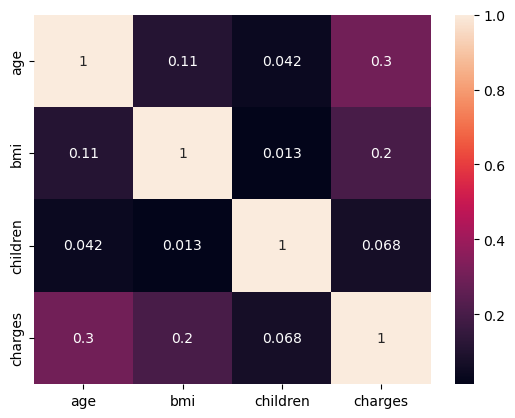

In [18]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), annot=True)
plt.show()

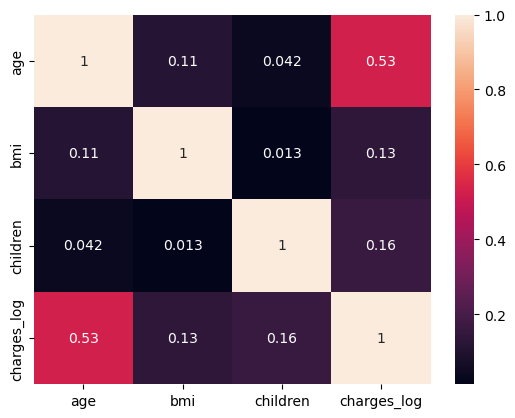

In [19]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges_log']].corr(), annot=True)
plt.show()

### **Analizamos las variables explicativas**

#### **1.Edad**

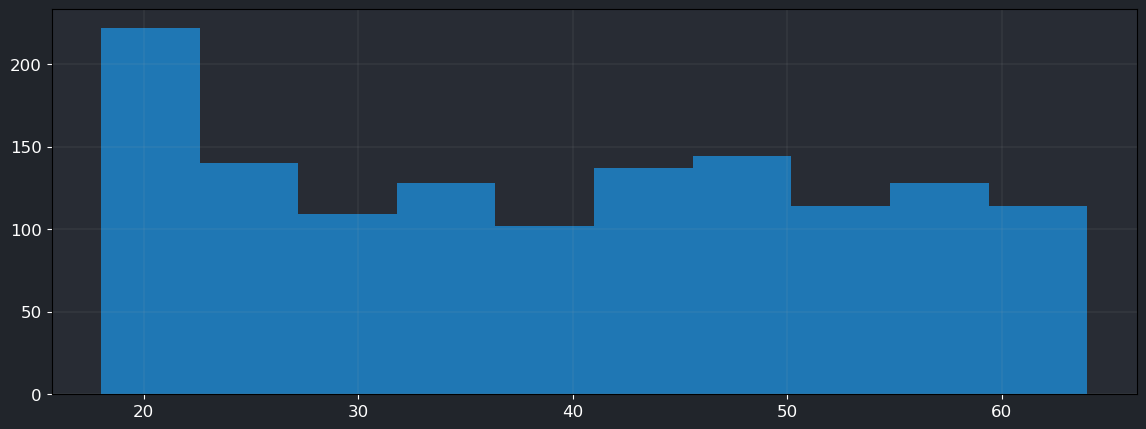

In [20]:
fig, ax = plt.subplots(figsize=(14, 5))

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.hist(df['age'])
# plt.hist(df['age'].apply(lambda x: np.log(x)))

plt.xticks(color='white', size=12)
ax.tick_params(axis='x', labelcolor='white', color='white')

plt.yticks(color='white', size=12)
ax.tick_params(axis='y', labelcolor='white', color='white')

plt.grid(linewidth=0.1)

plt.show()

In [21]:
df['age_log']=df['age'].apply(lambda x: np.log(x))

In [22]:
standarScaler = StandardScaler()
standarScaler.fit(np.array(df['age_log']).reshape(-1, 1))

StandardScaler()

In [23]:
df['age_log_est'] = standarScaler.transform(np.array(df['age_log']).reshape(-1, 1))

#### **2.Sexo**

In [24]:
df_sex = pd.get_dummies(df['sex']).reset_index()

In [25]:
df = pd.merge(df.reset_index(), df_sex, how='left', left_on='index', right_on='index').drop('index', axis=1)

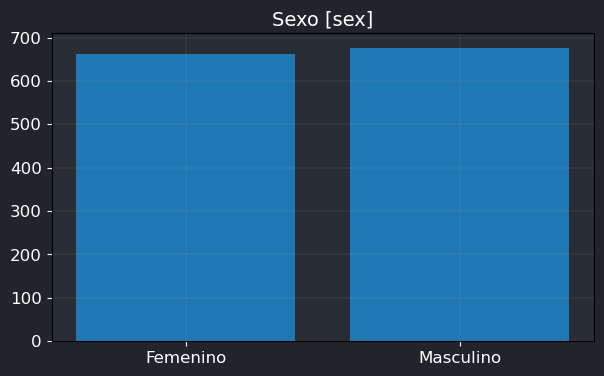

In [26]:
names = ['Femenino', 'Masculino']
values = [df.groupby('sex')[['ID']].count().loc['female']['ID'], df.groupby('sex')[['ID']].count().loc['male']['ID']]

fig, ax = plt.subplots(figsize=(7, 4))

plt.title('Sexo [sex]', fontsize=14 ,color='white')

fig.patch.set_facecolor('#21252b')
ax.set_facecolor('#282c34')

plt.bar(names, height=values, width=0.8)

plt.xticks(color='white', fontsize=12)
ax.tick_params(axis='x', color='white')

plt.yticks(color='white', fontsize=12)
plt.tick_params(axis='y', color='white')

plt.grid(linewidth=0.1)
plt.show()

#### **3.Indice de masa corporal**

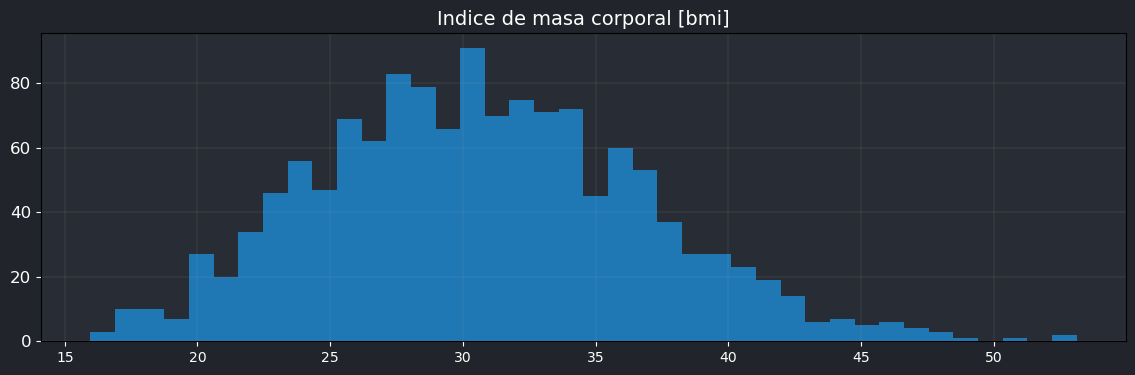

In [27]:
fig, ax = plt.subplots(figsize = (14, 4))
plt.title('Indice de masa corporal [bmi]', fontsize=14, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.hist(df['bmi'], bins=40)

plt.yticks(color='white', size=12)
ax.tick_params(axis='x', labelcolor='white', color='white')

plt.yticks(color='white', size=12)
ax.tick_params(axis='y', labelcolor='white', color='white')

plt.grid(linewidth=0.1)

plt.show()

In [28]:
standarScaler = StandardScaler()
standarScaler.fit(np.array(df['bmi']).reshape(-1, 1))

StandardScaler()

In [29]:
df['bmi_est'] = standarScaler.transform(np.array(df['bmi']).reshape(-1, 1))

#### **4.Número de hijos**

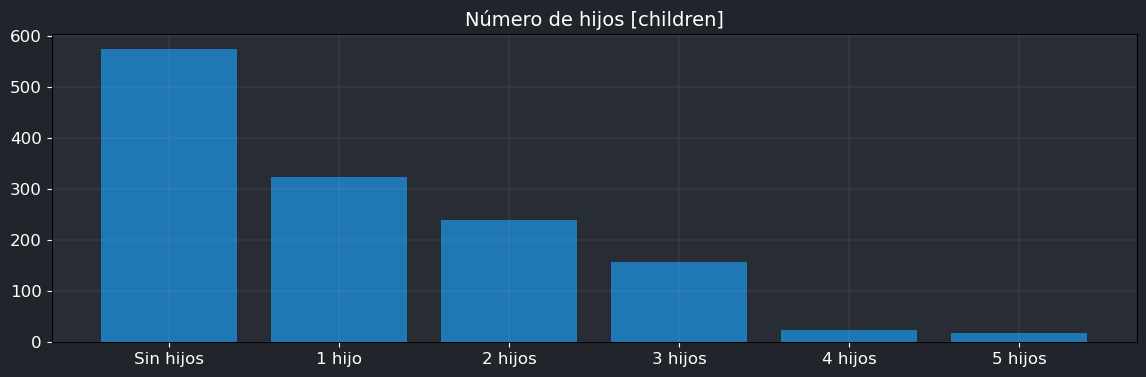

In [30]:
names = ['Sin hijos', '1 hijo', '2 hijos', '3 hijos', '4 hijos', '5 hijos']
values = [
    df.groupby('children')[['ID']].count().loc[0]['ID'], 
    df.groupby('children')[['ID']].count().loc[1]['ID'], 
    df.groupby('children')[['ID']].count().loc[2]['ID'], 
    df.groupby('children')[['ID']].count().loc[3]['ID'], 
    df.groupby('children')[['ID']].count().loc[4]['ID'], 
    df.groupby('children')[['ID']].count().loc[5]['ID'], 
]

fig, ax = plt.subplots(figsize=(14, 4))

plt.title('Número de hijos [children]', fontsize=14 ,color='white')

fig.patch.set_facecolor('#21252b')
ax.set_facecolor('#282c34')

plt.bar(names, height=values, width=0.8)

plt.xticks(color='white', fontsize=12)
ax.tick_params(axis='x', color='white')

plt.yticks(color='white', fontsize=12)
plt.tick_params(axis='y', color='white')

plt.grid(linewidth=0.1)
plt.show()

In [31]:
df_children = pd.get_dummies(df['children']).reset_index()

In [32]:
df_children.columns = ['index', 'Sin hijos', '1 hijo', '2 hijos', '3 hijos', '4 hijos', '5 hijos']

In [33]:
df = pd.merge(df.reset_index(), df_children, how='left', left_on='index', right_on='index').drop('index', axis=1)

#### **5. Fumador - No Fumador**

In [34]:
df.groupby(['smoker'])[['ID']].count()

,ID
smoker,
no,1064
yes,274


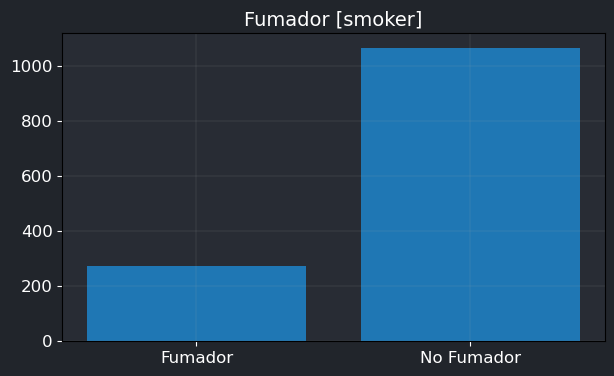

In [35]:
names = ['Fumador', 'No Fumador']
values = [df.groupby('smoker')[['ID']].count().loc['yes']['ID'], df.groupby('smoker')[['ID']].count().loc['no']['ID']]

fig, ax = plt.subplots(figsize=(7, 4))

plt.title('Fumador [smoker]', fontsize=14 ,color='white')

fig.patch.set_facecolor('#21252b')
ax.set_facecolor('#282c34')

plt.bar(names, height=values, width=0.8)

plt.xticks(color='white', fontsize=12)
ax.tick_params(axis='x', color='white')

plt.yticks(color='white', fontsize=12)
plt.tick_params(axis='y', color='white')

plt.grid(linewidth=0.1)

plt.show()

In [36]:
df_smoker = pd.get_dummies(df['smoker']).reset_index()

In [37]:
df_smoker.columns = ['index', 'No smoker', 'Smoker']

In [38]:
df = pd.merge(df.reset_index(), df_smoker, how='left', left_on='index', right_on='index').drop('index', axis=1)

#### **6. Region**

In [39]:
df.groupby(['region'])[['ID']].count()

,ID
region,
northeast,324
northwest,325
southeast,364
southwest,325


In [40]:
df.groupby('region')[['ID']].count().reset_index().loc[0]['ID']

324

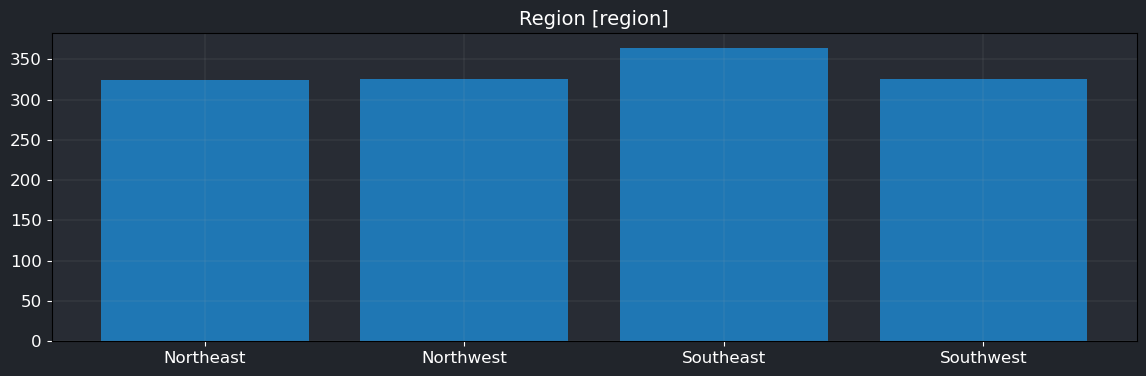

In [41]:
names = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
values = [
    df.groupby('region')[['ID']].count().reset_index().loc[0]['ID'], 
    df.groupby('region')[['ID']].count().reset_index().loc[1]['ID'], 
    df.groupby('region')[['ID']].count().reset_index().loc[2]['ID'], 
    df.groupby('region')[['ID']].count().reset_index().loc[3]['ID'] 
]

fig, ax = plt.subplots(figsize=(14, 4))

plt.title('Region [region]', fontsize=14 ,color='white')

fig.patch.set_facecolor('#21252b')
ax.set_facecolor('#282c34')

plt.bar(names, height=values, width=0.8)

plt.xticks(color='white', fontsize=12)
ax.tick_params(axis='x', color='white')

plt.yticks(color='white', fontsize=12)
plt.tick_params(axis='y', color='white')

plt.grid(linewidth=0.1)
plt.show()

In [42]:
df_region = pd.get_dummies(df['region']).reset_index()

In [43]:
df = pd.merge(df.reset_index(), df_region, how='left', left_on='index', right_on='index').drop('index', axis=1)

## **Modelo de Regresión Lineal**

### **Entrenamiento del modelo**

In [44]:
df_model = df[[
    'age_log_est',
    'female',
    'male',
    'bmi_est',
    'Sin hijos',
    '1 hijo',
    '2 hijos',
    '3 hijos',
    '4 hijos',
    '5 hijos',
    'No smoker',
    'Smoker',
    'northeast',
    'northwest',
    'southeast',
    'southwest',
    'charges_log_est'
]].copy()

In [45]:
X = df_model.drop('charges_log_est', axis=1)
y = df_model['charges_log_est']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Feature Importance**

In [48]:
a = pd.DataFrame(enumerate(model.coef_))
a.columns = ['Variable', 'Importance']

a['Variable'] = a['Variable'].apply(lambda x: list(X)[x])
a.sort_values('Importance', ascending=False)

,Variable,Importance
11,Smoker,0.833829
0,age_log_est,0.521974
8,4 hijos,0.224111
9,5 hijos,0.137315
12,northeast,0.094419
3,bmi_est,0.091332
1,female,0.034820
6,2 hijos,0.032051
13,northwest,0.029513
7,3 hijos,-0.024348


### **Resultados del modelo**

In [49]:
y_predict = model.predict(X_test)

**R2**

In [50]:
r2 = r2_score(y_test, y_predict)

In [51]:
print(f'La presición del modelo es del {round(r2, 2)*100}%')

La presición del modelo es del 84.0%


**MSE**

In [52]:
mse = round(mean_squared_error(y_test, y_predict), 2)

In [53]:
print(f'El error cuadratico medio del modelo es de {mse}')

El error cuadratico medio del modelo es de 0.16
